In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline 

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [3]:
BAC = data.DataReader('BAC', 'google', start, end)

In [4]:
# use google finance to acquire the data 
C = data.DataReader('C', 'google', start, end)
GS = data.DataReader('GS', 'google', start, end)
JPM = data.DataReader('JPM', 'google', start, end)
MS = data.DataReader('MS', 'google', start, end)
WFC = data.DataReader('WFC', 'google', start, end)

In [5]:
tickers = ['BAC', 'C', 'GS','JPM', 'MS', 'WFC']

In [6]:
#same index of datetime 
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys=tickers)

In [7]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [8]:
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

('BAC', 54.9)
('C', 564.1)
('GS', 247.92)
('JPM', 70.08)
('MS', 89.3)
('WFC', 58.52)


In [9]:
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [10]:
#returns for some period 
returns = pd.DataFrame()

In [11]:
#pct_change()
for tick in tickers:
    returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()

In [12]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


/Library/Python/2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


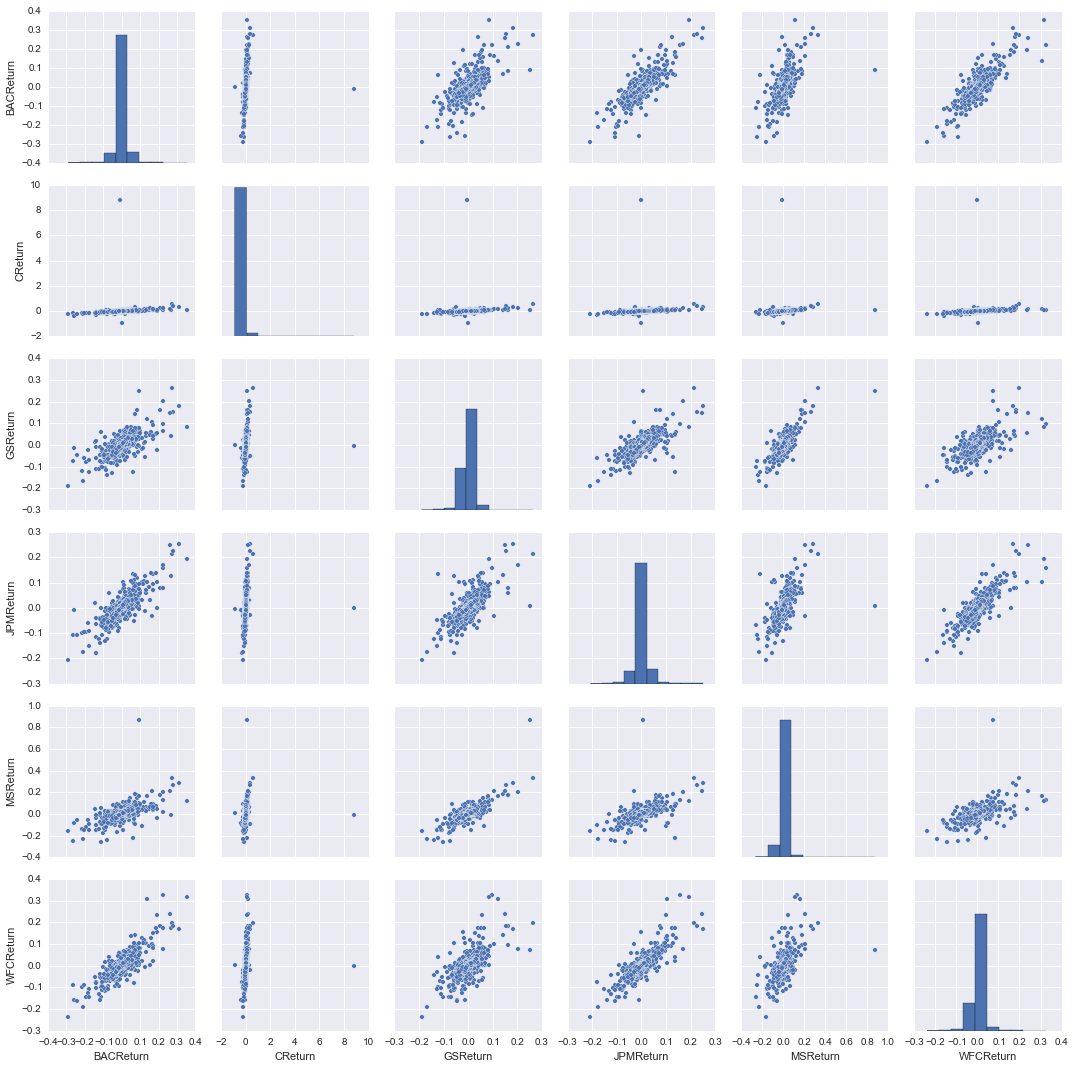

In [13]:
import seaborn as sns
sns.pairplot(returns[1:])
#citi group has a crash

In [14]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2011-05-06
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [15]:
returns.idxmax()  # max on which day 

BACReturn   2009-04-09
CReturn     2011-05-09
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [16]:
returns.std()  # citi group is risky 

BACReturn    0.036650
CReturn      0.179969
GSReturn     0.025346
JPMReturn    0.027656
MSReturn     0.037820
WFCReturn    0.030233
dtype: float64

In [17]:
returns.ix['2015-01-01' : '2015-12-31'].std()  # very similar 

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

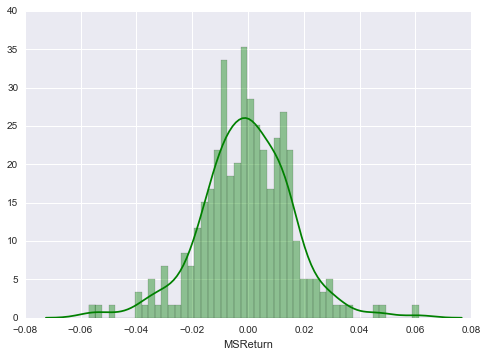

In [18]:
sns.distplot(returns.ix['2015-01-01' : '2015-12-31']['MSReturn'], color='green', bins = 50)

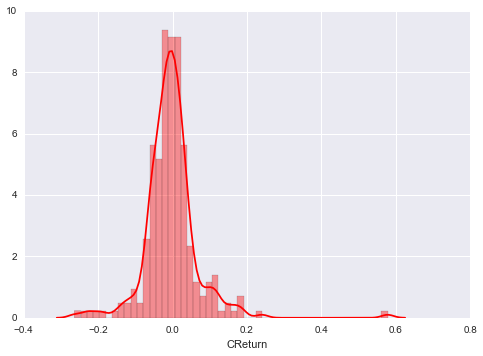

In [19]:
sns.distplot(returns.ix['2008-01-01' : '2008-12-31']['CReturn'], color='red', bins = 50)
# strike  financial crisis 

In [20]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

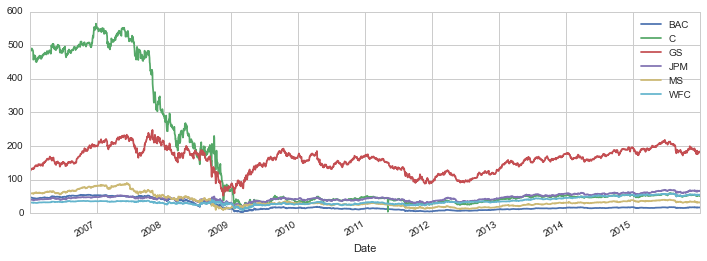

In [21]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label = tick, figsize=(12,4))
plt.legend()

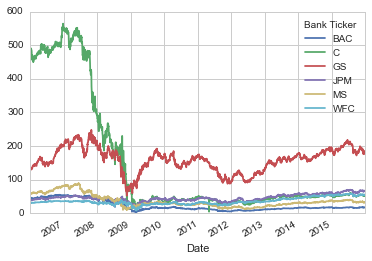

In [22]:
bank_stocks.xs(key='Close', axis=1, level = 'Stock Info').plot()

In [23]:
bank_stocks.xs(key='Close', axis=1, level = 'Stock Info').iplot()

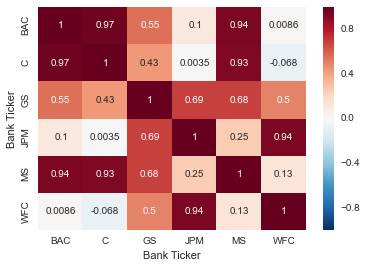

In [28]:
sns.heatmap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot=True)

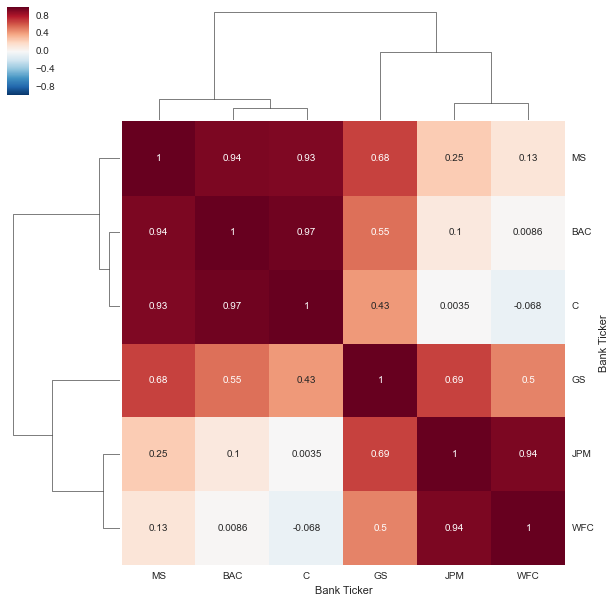

In [29]:
sns.clustermap(bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot=True)

In [30]:
close_corr = bank_stocks.xs(key='Close', axis=1, level = 'Stock Info').corr()

In [31]:
close_corr.iplot(kind = 'heatmap', colorscale='rdylbu')

In [32]:
bac15 = BAC[['Open','High', 'Low', 'Close']].ix['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')